In [1]:
%run ./01_data_prep.ipynb
%run utils.ipynb

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# Using SGD with random hyperparameters and hinge loss function
# Using a preprocessing pipeline to standardize the data
scaler = StandardScaler()
est = make_pipeline(StandardScaler(), SGDClassifier())
est.fit(X_train, y_train)
est.predict(X_train)
est.score(X_valid, y_valid)


0.8711502925777641

In [4]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [5]:
# It is a good idea to scale the data when using SGD
def scale_data(train, valid):
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scaling data
    X_train2 = scaler.transform(train)
    X_valid2 = scaler.transform(valid)  # apply same transformation to test data
    return (X_train2, X_valid2)

In [6]:
# New classifier to try different hyperparams 
clf = SGDClassifier()

X_train2, X_valid2 = scale_data(X_train, X_valid)

# Hypertuning parameters
# A good first guess for max_iter is ceil(10**6 / n) n = size of training data, doing 10k step iterations
# Trying different loss functions
# Trying an exponentially decreasing alpha
param_grid = {'max_iter' : np.arange(10000, 100000, 10000), "loss" : ["hinge", "log"], "alpha" : 10.0**-np.arange(1,7)}

# Cross validating data with 5 folds
clf_gs = GridSearchCV(clf, param_grid, cv=5, n_jobs=10)

clf_gs.fit(X_train2, y_train)

KeyboardInterrupt: 

In [ ]:
# Check score of best hyperparams
clf_gs.best_score_

0.8756736860626232

In [ ]:
# Check best value of hyperparams
clf_gs.best_params_

{'alpha': 0.01, 'loss': 'hinge', 'max_iter': 60000}

In [19]:
# Constructing a complexity curve with different values for regularization parameter (alpha)

p = list(10.0**-np.arange(1,5))
lst_test =[]
lst_train =[]
for i in p:
    clf2 = SGDClassifier(alpha = i, max_iter=60000, loss="hinge")
    X_train2, X_valid2 = scale_data(X_train, X_valid)
    clf2.fit(X_train2, y_train)
    z = clf2.score(X_valid2, y_valid)
    t = clf2.score(X_train2, y_train)
    lst_test.append(z)
    lst_train.append(t)

In [20]:
import matplotlib.pyplot as plt

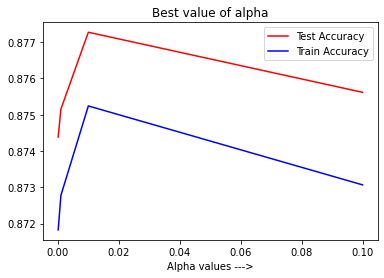

In [21]:
plt.plot(p, lst_test, color ='red', label='Test Accuracy')
plt.plot(p, lst_train, color ='b', label='Train Accuracy', scalex=False)
plt.xlabel('Alpha values --->')
plt.title('Best value of alpha')
plt.legend()
plt.savefig('SGD_complexity.png')

This model performed better on test data than training data with minor tuning of the alpha parameter (regularization), achieving similar results to tuning max_iter, alpha and loss function using GridSearch

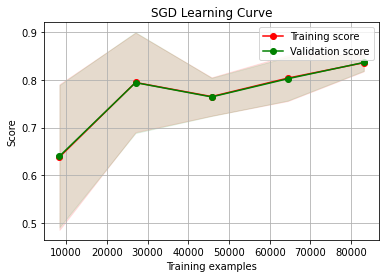

In [22]:
# Using alpha = 0.01
model = SGDClassifier(alpha=0.01)

plot_learning_curve(model, "SGD Learning Curve", X_train, y_train, n_jobs=2)
plt.savefig("SGD Learning Curve.png")